**Carga y visualización de Imágenes Médicas**

Sherlyn Andrea Guzmán Graciano cc 1007869053 

Miguel López Velez cc 1001014378

Carga y visualización de Imágenes DICOM


In [1]:
#importamos las librerias necesarias para manipular archivos DICOM

import pydicom
import matplotlib.pyplot as plt
#dcm_data = pydicom.dcmread(r'Data\IMG0002.dcm')
dcm_data = pydicom.dcmread(r'Data/IMG0002.dcm')
dcm_data


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 254
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.58165538146238861317149318092029100
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.9.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.9'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.5816553814623886131714931

In [2]:
#Ahora, hacemos lo mismo pero para varios archivos
import os
folder = 'Data'
Lista_A = os.listdir(folder)
print("Datos cargados:",len(Lista_A))

Datos cargados: 243


In [3]:
#Teniendo la lista, leemos todos los archivos
lista_dcm_data = []

for archivo in Lista_A:
    if archivo.endswith('.dcm'):
        
        ruta_archivo = os.path.join(folder, archivo)
        lista_dcm_data.append(pydicom.dcmread(ruta_archivo))

In [4]:
print("Metadata leida",len(lista_dcm_data))

Metadata leida 243


In [5]:
#Ejemplo de como se ve la metadata de una imagen
lista_dcm_data[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 254
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.32968471229439883559269560682449196
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.9.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.9'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.3296847122943988355926956

In [6]:
#Vemos toda la información que podemos extraer
dcm_data. dir()

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'Columns',
 'ContentDate',
 'ContentTime',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'ReferringPhysicianName',
 'RescaleType',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDate',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SeriesTime',
 'SliceThickness',
 'SpacingBetweenSlices',
 'StudyDate',
 'StudyDescription',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'WindowCenter',
 'WindowWidth']

In [7]:
import pandas as pd
d1=pd.DataFrame(columns=["Nombre","Modalidad","Descripción","Fecha"])
#Extraemos la información relevante de cada imagen
numero_ = 0
for archivo in lista_dcm_data:
        
        patient_name = str(archivo.PatientName)
        modality = archivo.Modality
        study_description = archivo.StudyDescription
        Date = archivo.ContentDate

        Datef = f"{Date[6:8]}/{Date[4:6]}/{Date[0:4]}"
        numero_ += 1

        #Creamos un dataframe a base de la información de cada imagen con los datos de interes
        d1.loc[numero_]=[patient_name,modality,study_description,Datef]
d1

,Nombre,Modalidad,Descripción,Fecha
1,CN_0234,MR,BRAIN MRI,25/02/2024
2,CN_0234,MR,BRAIN MRI,25/02/2024
3,CN_0234,MR,BRAIN MRI,25/02/2024
4,CN_0234,MR,BRAIN MRI,25/02/2024
5,CN_0234,MR,BRAIN MRI,25/02/2024
...,...,...,...,...
239,CN_0234,MR,BRAIN MRI,25/02/2024
240,CN_0234,MR,BRAIN MRI,25/02/2024
241,CN_0234,MR,BRAIN MRI,25/02/2024
242,CN_0234,MR,BRAIN MRI,25/02/2024


Como se observa, la información se toma de todos los archivos y es la misma. Ahora vamos a inspeccionar y eliminar todos los duplicados para así solo tener la información organizada de un paciente.

In [8]:
d1=d1.drop_duplicates()
d1

,Nombre,Modalidad,Descripción,Fecha
1,CN_0234,MR,BRAIN MRI,25/02/2024


De esta forma se deja solo la información útil de solo un paciente.

Anonimización de Datos Sensibles

In [9]:
from pydicom import dcmwrite
data_elements = ['PatientID','PatientBirthDate', 'PatientName','PatientSex']

# Creamos una nueva carpeta para guardar las imágenes anonimizadas
os.makedirs('anonimized_data', exist_ok=True)

# Iteramos sobre cada objeto DICOM en la lista
for i, dcm_data in enumerate(lista_dcm_data, start=1):
        
        # Anonimizamos los elementos de datos
        for element in data_elements:
            if element in dcm_data:
                dcm_data[element].value = 'anonimo'

        # Guardamos la imagen anonimizada en una nueva carpeta
        new_filename = f'anonimized_data/00_{i}_anonimo.dcm'
        dcmwrite(new_filename, dcm_data)
        print(f'Imagen anonimizada {i} guardada como {new_filename}')


/home/astolfo/anaconda3/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR DA: 'anonimo'.
  warnings.warn(msg)
/home/astolfo/anaconda3/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR CS: 'anonimo'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen anonimizada 1 guardada como anonimized_data/00_1_anonimo.dcm
Imagen anonimizada 2 guardada como anonimized_data/00_2_anonimo.dcm
Imagen anonimizada 3 guardada como anonimized_data/00_3_anonimo.dcm
Imagen anonimizada 4 guardada como anonimized_data/00_4_anonimo.dcm
Imagen anonimizada 5 guardada como anonimized_data/00_5_anonimo.dcm
Imagen anonimizada 6 guardada como anonimized_data/00_6_anonimo.dcm
Imagen anonimizada 7 guardada como anonimized_data/00_7_anonimo.dcm
Imagen anonimizada 8 guardada como anonimized_data/00_8_anonimo.dcm
Imagen anonimizada 9 guardada como anonimized_data/00_9_anonimo.dcm
Imagen anonimizada 10 guardada como anonimized_data/00_10_anonimo.dcm
Imagen anonimizada 11 guardada como anonimized_data/00_11_anonimo.dcm
Imagen anonimizada 12 guardada como anonimized_data/00_12_anonimo.dcm
Imagen anonimizada 13 guardada como anonimized_data/00_13_anonimo.dcm
Imagen anonimizada 14 guardada como anonimized_data/00_14_anonimo.dcm
Imagen anonimizada 15 guardada como an

In [12]:
#Ahora, revisamos una nueva imagen para ver si los elementos escogidos fueron anonimizados.

dcm_data_anonimized = pydicom.dcmread(r'anonimized_data/00_1_anonimo.dcm')
dcm_data_anonimized.PatientName


'anonimo'

## Conversión de datos a nifti

In [13]:
!mkdir datos_nifti

In [14]:
import dicom2nifti
#importamos la libreria necesaria para la conversión de datos dicom a nifti
#definimos una variable data_dicom que almacena la ruta del directorio que contiene los archivos DICOM que deseamos convertir. 
data_dicom="./anonimized_data"
data_nifti="./datos_nifti"
dicom2nifti.convert_directory(data_dicom,data_nifti)

In [15]:
# importamos nilearn para trabajar con datos de imágenes cerebrales
#Usamos plotting e image, ya que nos permiten visualizar imágenes de neuroimagen y cargar imágenes en formato NIfTI.

import nilearn
from nilearn import plotting,image
img_r="./datos_nifti/1_no_series_description.nii.gz"
img=image.load_img(img_r)


/home/astolfo/anaconda3/lib/python3.11/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


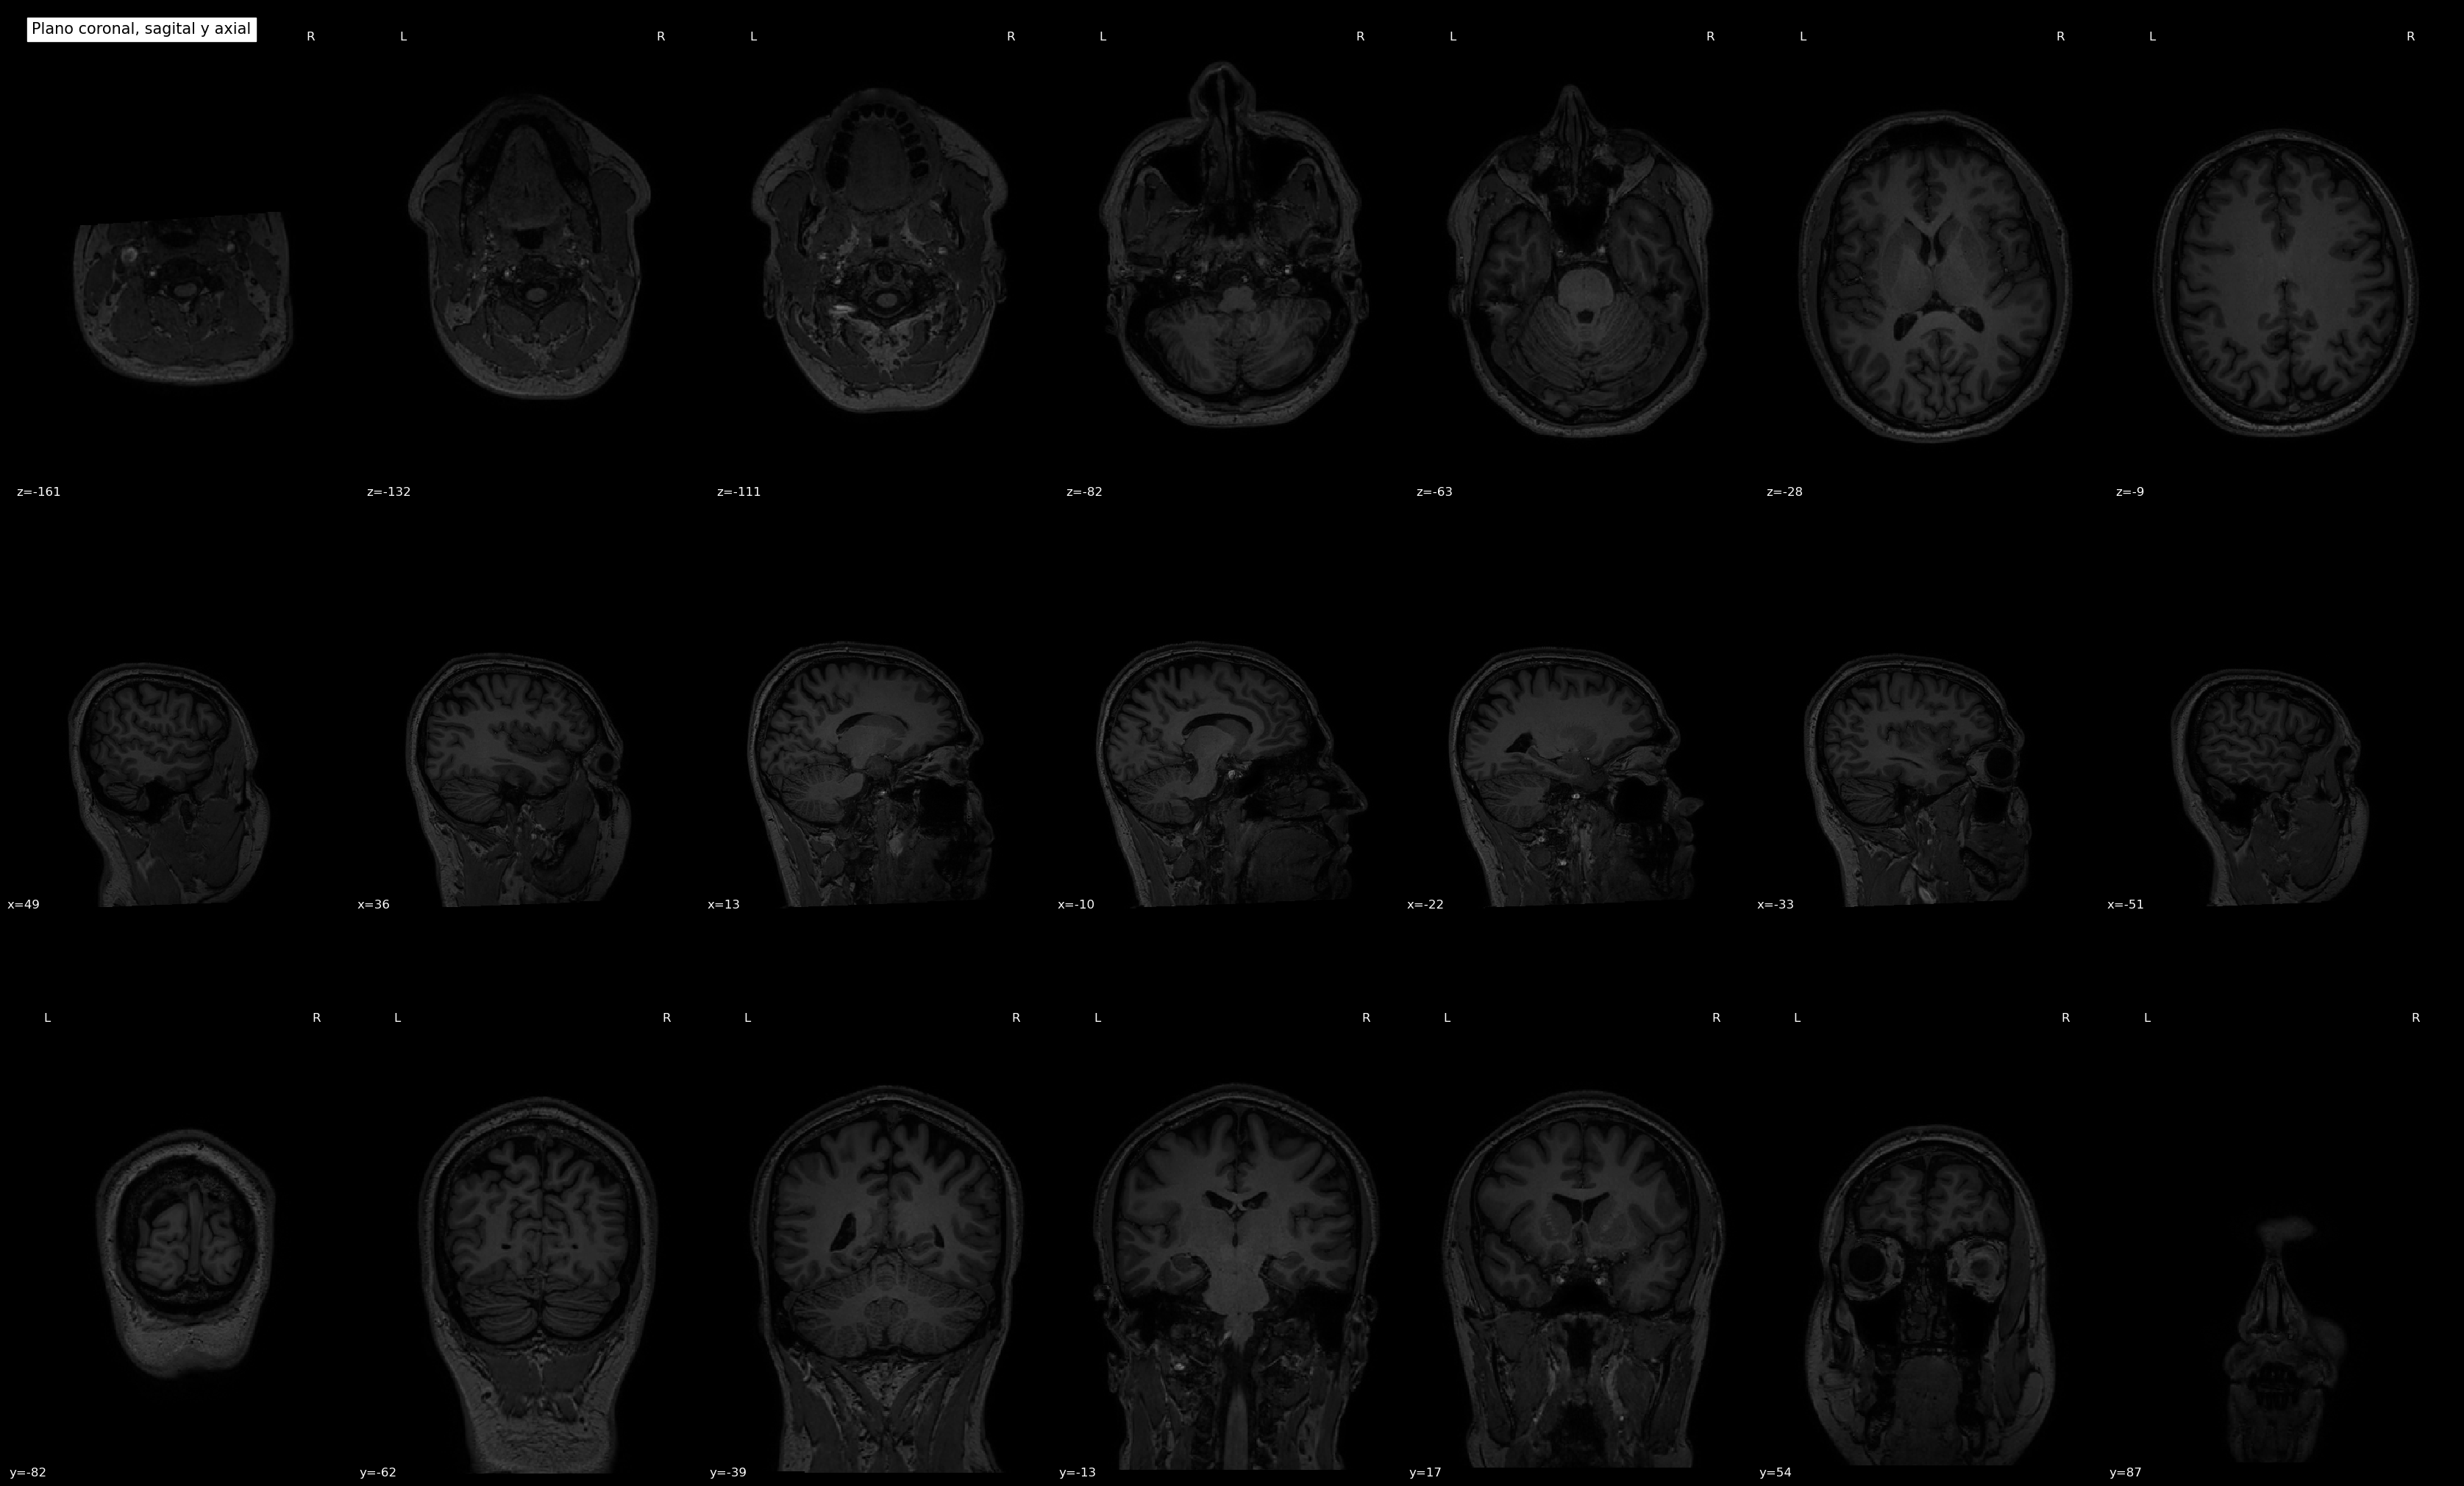

In [16]:
#Graficamos
plotting.plot_anat(img,display_mode="mosaic",title="Plano coronal, sagital y axial")

/home/astolfo/anaconda3/lib/python3.11/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


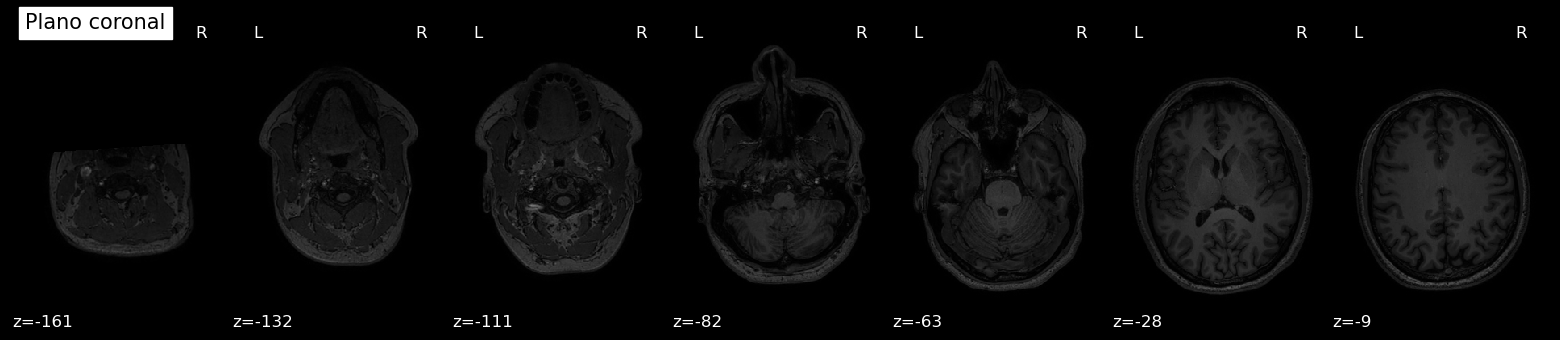

In [21]:
plotting.plot_anat(img,display_mode="z",title="Plano coronal")

/home/astolfo/anaconda3/lib/python3.11/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


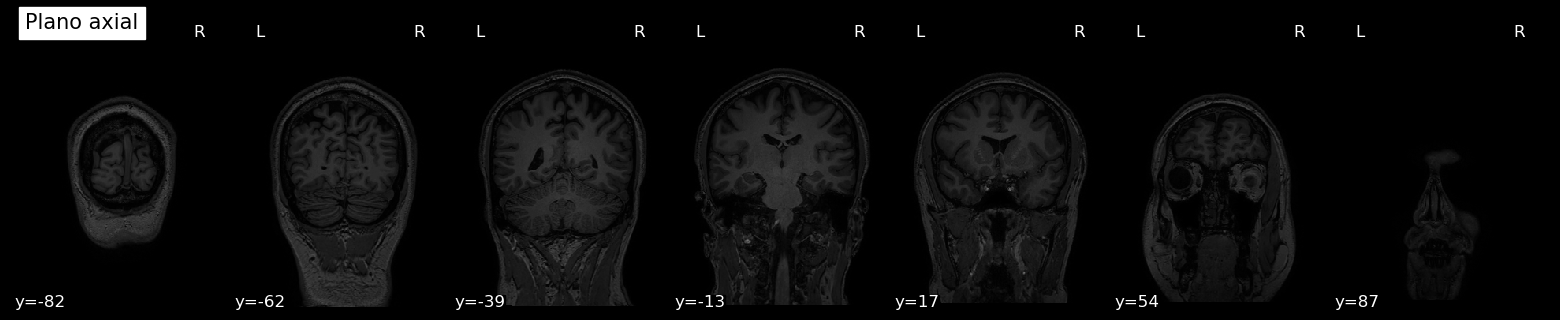

In [18]:
plotting.plot_anat(img,display_mode="y",title="Plano axial")

/home/astolfo/anaconda3/lib/python3.11/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


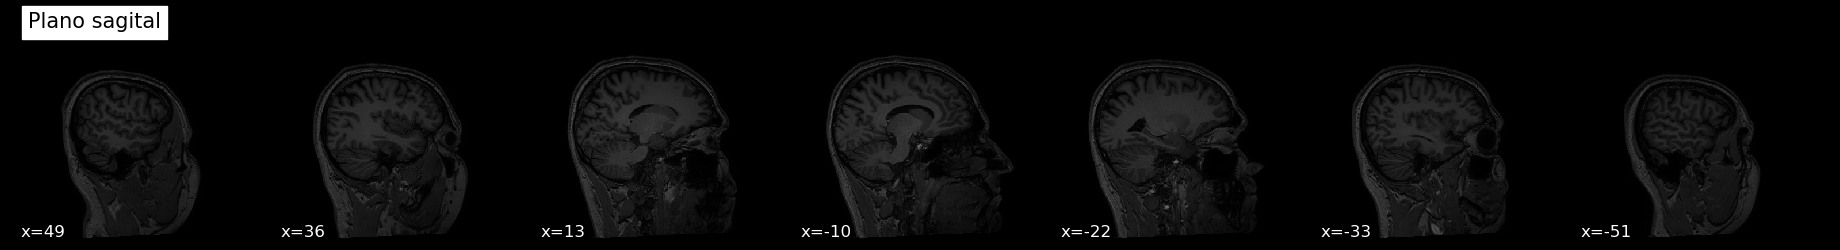

In [19]:
plotting.plot_anat(img,display_mode="x",title="Plano sagital")

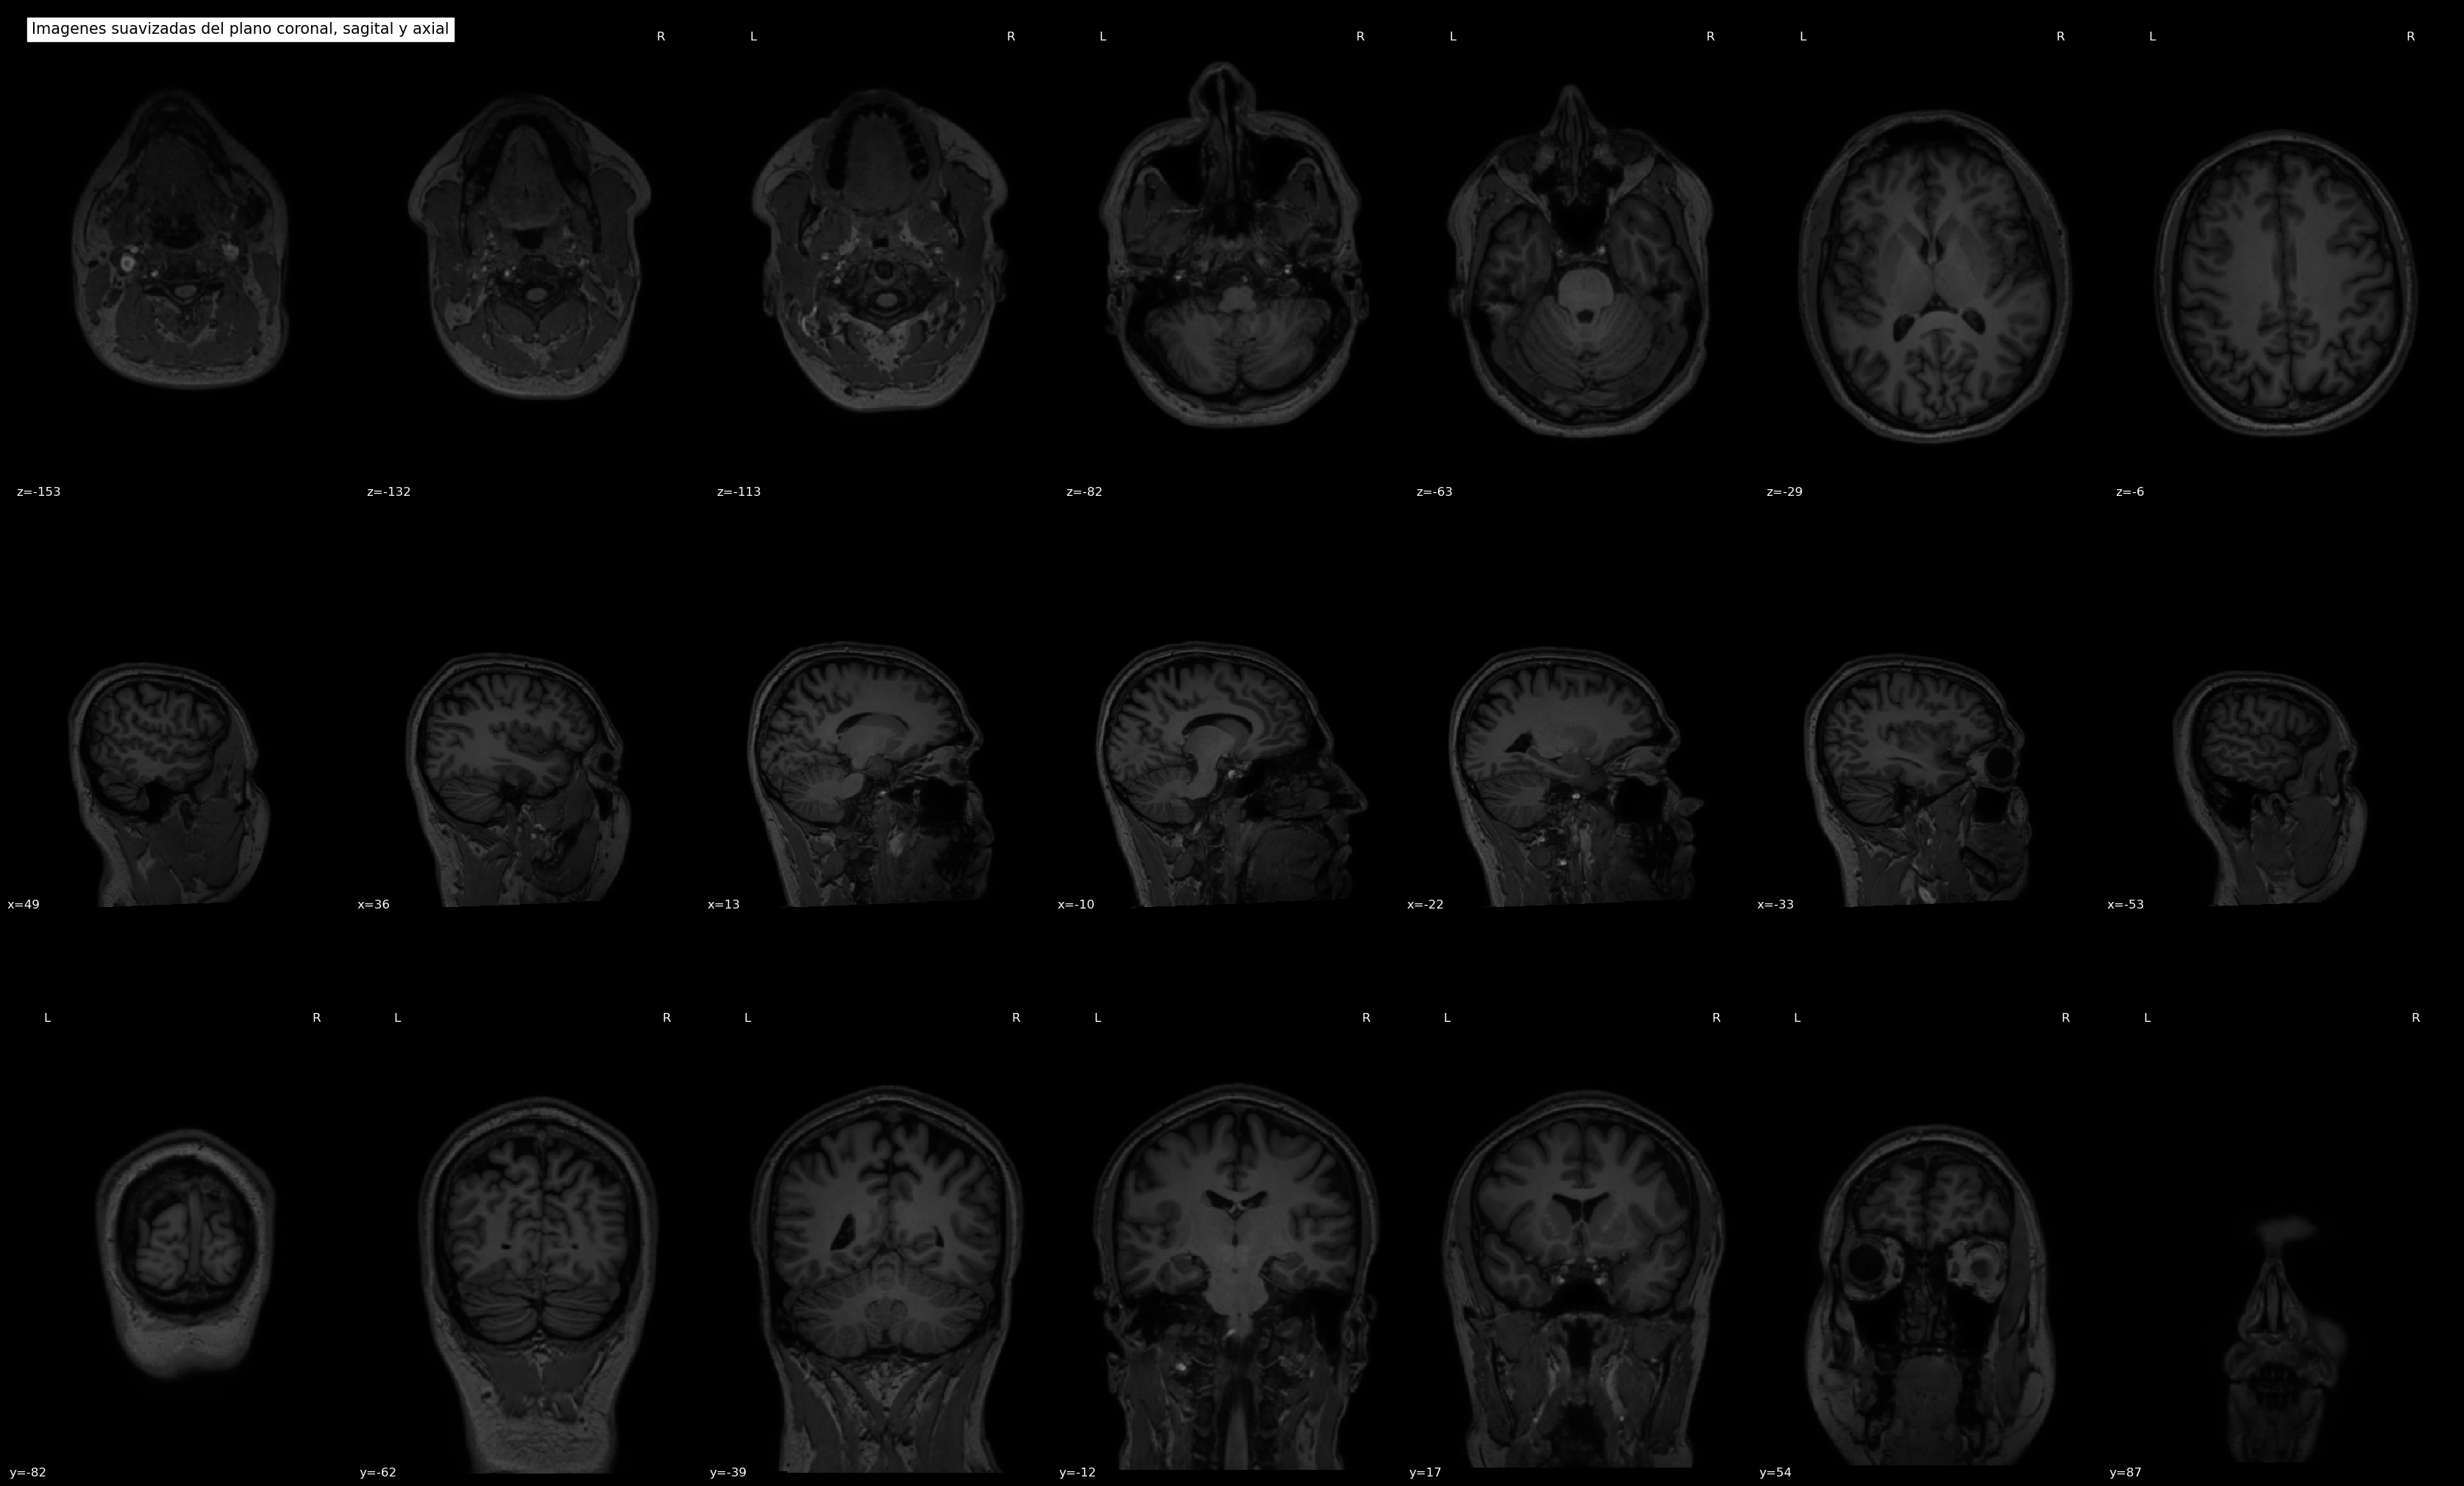

In [20]:
smooth=image.smooth_img(img,fwhm=1)
plotting.plot_anat(smooth,display_mode="mosaic",title="Imagenes suavizadas del plano coronal, sagital y axial")